In [1]:
import pandas as pd, matplotlib.pyplot as plt, geopandas as gpd, contextily as ctx, numpy as np

In [2]:
rosetta0 = pd.read_csv("rosetta.csv")
rosetta0.columns

Index(['Unnamed: 0', 'PERSONA_REF_ID', 'HOGAR_REF_ID', 'SEXO', 'EDAD',
       'P_NACDAD', 'P_ALFAB', 'P_CONMPU', 'P_ASISTEDU', 'P_NIVELED',
       'P_COMPLED', 'CONDACT', 'VIVIENDA_REF_ID', 'H_MAT_PISO', 'H_MAT_CUBTA',
       'H_REVEST', 'H_AGUA', 'H_PROC_AGUA', 'BAÑO', 'H_LIMP_I', 'H_DESAGUE_I',
       'H_BAÑO_EXC', 'H_COMBUST', 'H_HABI_DOR', 'H_HABI_TOT', 'HELADERA',
       'H_COMPUTADORA', 'CELULAR', 'TELEFONO', 'PROP', 'INDHAC', 'TOTPERS',
       'ALGUNBI', 'RADIO_REF_ID', 'VV_TIPO', 'VV_PART', 'VV_OCUP', 'VV_COLEC',
       'VV_CALIDAD_SERVS', 'VV_CALIDAD_MAT', 'VV_CALIDAD_CONS', 'RADIO'],
      dtype='object')

In [3]:
rosetta = rosetta0.drop(['Unnamed: 0'], axis=1)

In [4]:
tabla_intermedia0 = pd.read_csv("tabla_intermedia.csv")

In [5]:
tabla_intermedia0.drop(["Unnamed: 0"], axis=1)
tabla_intermedia = tabla_intermedia0[["RADIO",	"circuito",	"RADIO.CIRCUITO"]]
tabla_intermedia["circuito"] = tabla_intermedia["circuito"].astype(str)

C:\Users\Angelo\AppData\Local\Temp\ipykernel_11856\1707172542.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla_intermedia["circuito"] = tabla_intermedia["circuito"].astype(str)


In [6]:
strp = tabla_intermedia["circuito"].str.pad(width=4, side="left", fillchar="0")
strp.to_frame()

,circuito
0,0005
1,0005
2,0005
3,0005
4,0005
...,...
3545,0158
3546,0158
3547,0158
3548,0158


In [7]:
tabla_intermedia['circuito'] = strp
tabla_intermedia.to_csv('tabla_intermedia2.csv')

C:\Users\Angelo\AppData\Local\Temp\ipykernel_11856\1964070122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla_intermedia['circuito'] = strp


In [36]:
circuitos_geometria = gpd.read_file("CABA.shp")
circuitos_geometria = circuitos_geometria[["circuito",	"geometry"]]
circuitos_geometria

,circuito,geometry
0,0003,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -..."
1,0045,"POLYGON Z ((-6501230.474 -4091702.182 0.000, -..."
2,0037,"POLYGON Z ((-6501166.688 -4087904.826 0.000, -..."
3,0018,"POLYGON Z ((-6498832.986 -4088373.028 0.000, -..."
4,0141,"POLYGON Z ((-6503862.400 -4078547.361 0.000, -..."
...,...,...
162,0135,"POLYGON Z ((-6507834.614 -4077215.626 0.000, -..."
163,0149,"POLYGON Z ((-6503253.371 -4080723.227 0.000, -..."
164,0101,"POLYGON Z ((-6515182.479 -4090061.116 0.000, -..."
165,0102,"POLYGON Z ((-6514598.831 -4088679.114 0.000, -..."


### COMPUTADORA

C:\Users\Angelo\anaconda3\envs\M4OP\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:>

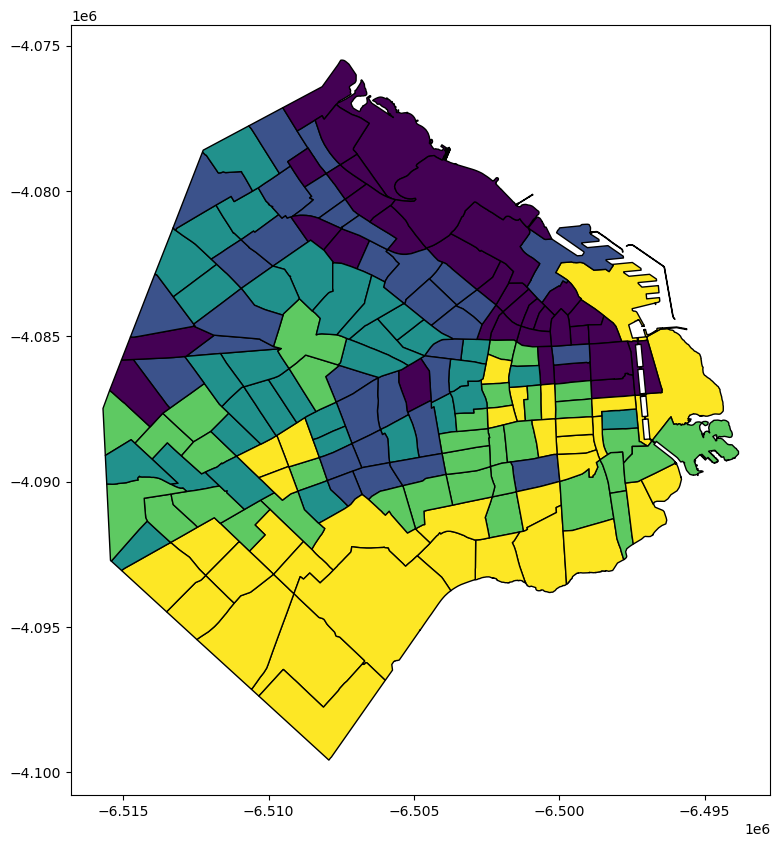

In [9]:
CO = rosetta[["RADIO","H_COMPUTADORA"]]
COM = pd.merge(CO,tabla_intermedia,on="RADIO",how="inner")
COME = pd.merge(tabla_intermedia,COM,on="RADIO",how="inner")
COME.rename(columns={"circuito_x":"circuito"},inplace=True)
COME = COME[["circuito","H_COMPUTADORA"]]
COMPUTADORA_agrupado = COME.groupby(['circuito']).mean()
COMPUTADORA_agrupado.reset_index(inplace=True)
COMPUTADORA_agrupado = COMPUTADORA_agrupado.rename(columns = {'index':'circuito'})
COMPMERG = pd.merge(circuitos_geometria,COMPUTADORA_agrupado,on="circuito",how="inner")
COMPMERG.plot(column='H_COMPUTADORA', scheme='quantiles', figsize=(10, 10),edgecolor="k")



In [10]:
COMPUTADORA_agrupado = COME.groupby(['circuito']).mean()
COMPUTADORA_agrupado.reset_index(inplace=True)
COMPUTADORA_agrupado = COMPUTADORA_agrupado.rename(columns = {'index':'circuito'})

In [11]:
COMPUTADORA_agrupado

,circuito,H_COMPUTADORA
0,0001,1.247969
1,0002,1.210352
2,0003,1.382533
3,0004,1.035981
4,0005,1.658835
...,...,...
162,0163,1.213124
163,0164,1.218056
164,0165,1.195068
165,0166,1.187718


<AxesSubplot:>

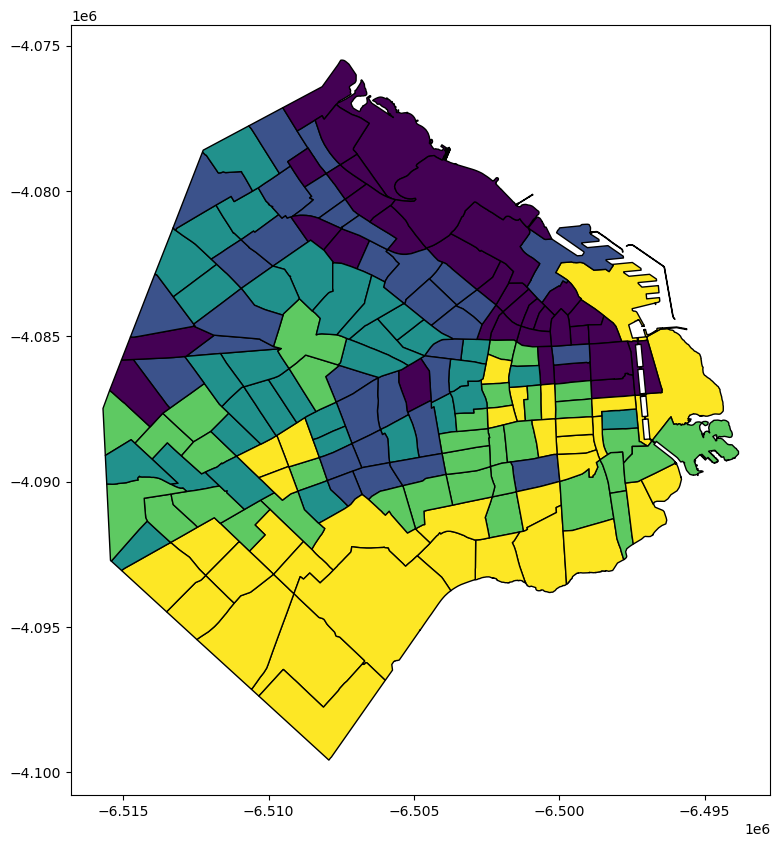

In [12]:
COMPMERG = pd.merge(circuitos_geometria,COMPUTADORA_agrupado,on="circuito",how="inner")
COMPMERG.plot(column='H_COMPUTADORA', scheme='quantiles', figsize=(10, 10),edgecolor="k")

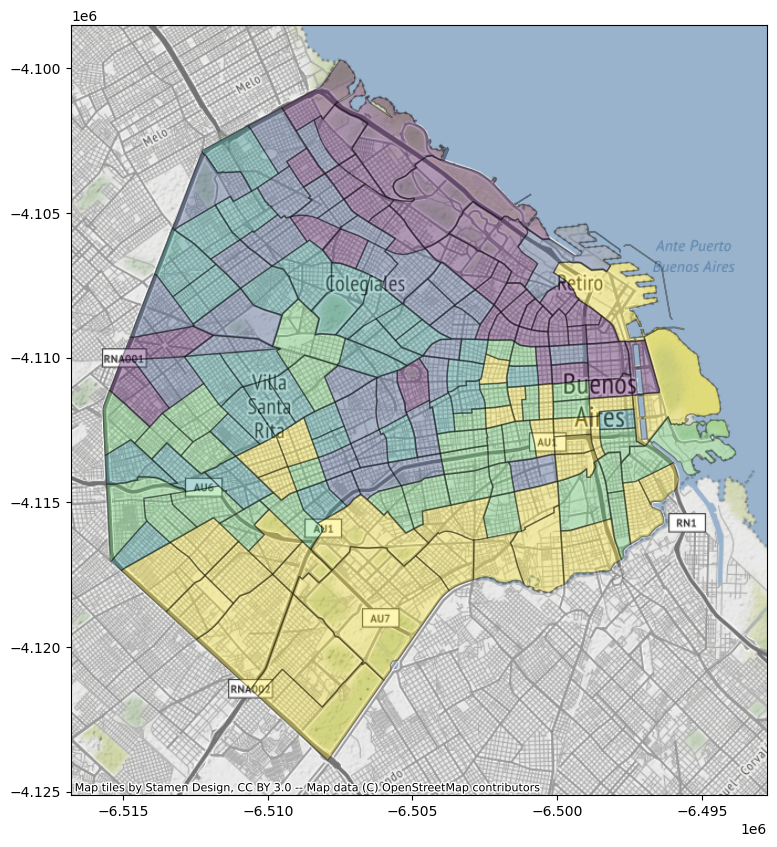

In [13]:
COMPMERG2 = COMPMERG.to_crs(epsg=3857)
ax = COMPMERG2.plot(column='H_COMPUTADORA',scheme='quantiles',figsize=(10, 10), alpha=0.35, edgecolor='k')
ctx.add_basemap(ax)

### Otra Variable

<AxesSubplot:>

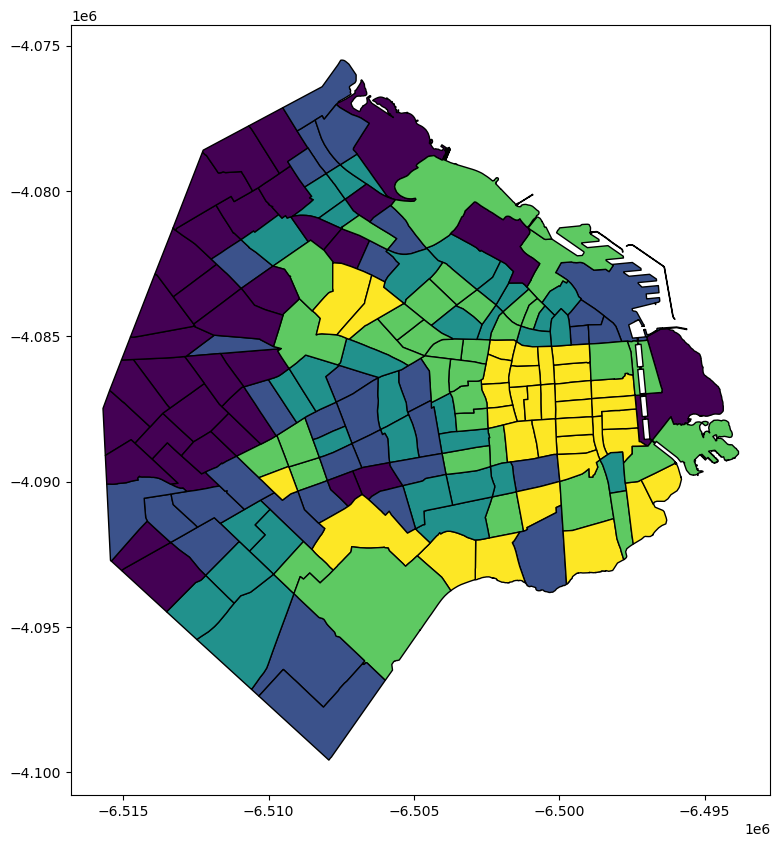

In [14]:
PROP = rosetta[["RADIO","PROP"]]
PROPM = pd.merge(PROP,tabla_intermedia,on="RADIO",how="inner")
PROPME = pd.merge(tabla_intermedia,PROPM,on="RADIO",how="inner")
PROPME.rename(columns={"circuito_x":"circuito"},inplace=True)
PROPME = PROPME[["circuito","PROP"]]
PROP_agrupado = PROPME.groupby(['circuito']).mean()
PROP_agrupado.reset_index(inplace=True)
PROP_agrupado = PROP_agrupado.rename(columns = {'index':'circuito'})
PMERG = pd.merge(circuitos_geometria,PROP_agrupado,on="circuito",how="inner")
PMERG.plot(column='PROP', scheme='quantiles', figsize=(10, 10),edgecolor="k")

<AxesSubplot:>

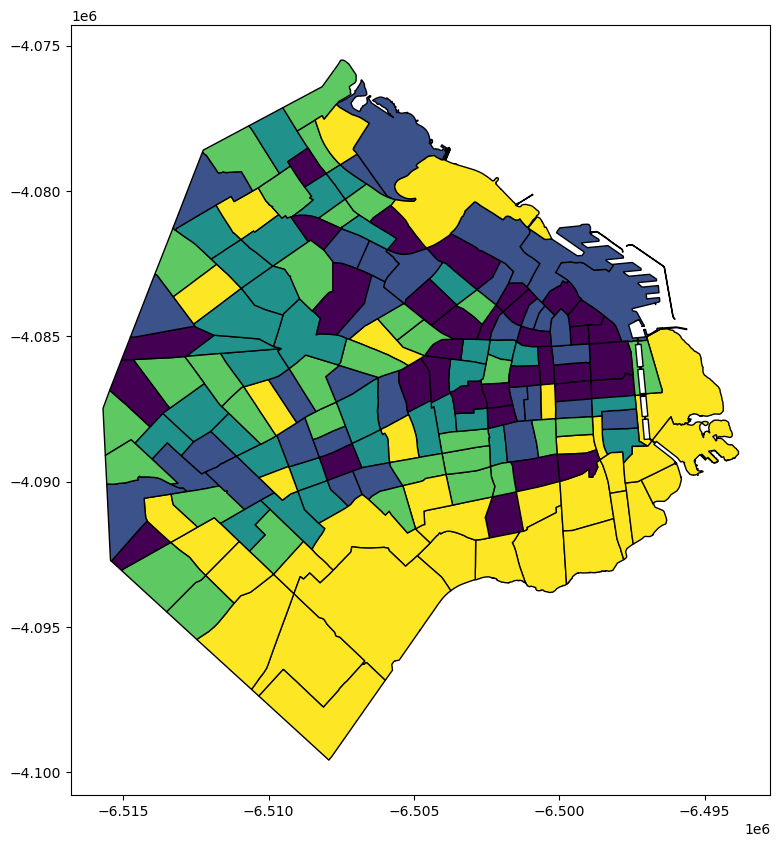

In [16]:
BAÑO = rosetta[["RADIO","BAÑO"]]
BAÑOM = pd.merge(BAÑO,tabla_intermedia,on="RADIO",how="inner")
BAÑOME = pd.merge(tabla_intermedia,BAÑOM,on="RADIO",how="inner")
BAÑOME.rename(columns={"circuito_x":"circuito"},inplace=True)
BAÑOME = BAÑOME[["circuito","BAÑO"]]
BAÑO_agrupado = BAÑOME.groupby(['circuito']).mean()
BAÑO_agrupado.reset_index(inplace=True)
BAÑO_agrupado = BAÑO_agrupado.rename(columns = {'index':'circuito'})
BMERG = pd.merge(circuitos_geometria,BAÑO_agrupado,on="circuito",how="inner")
BMERG.plot(column='BAÑO', scheme='quantiles', figsize=(10, 10),edgecolor="k")

<AxesSubplot:>

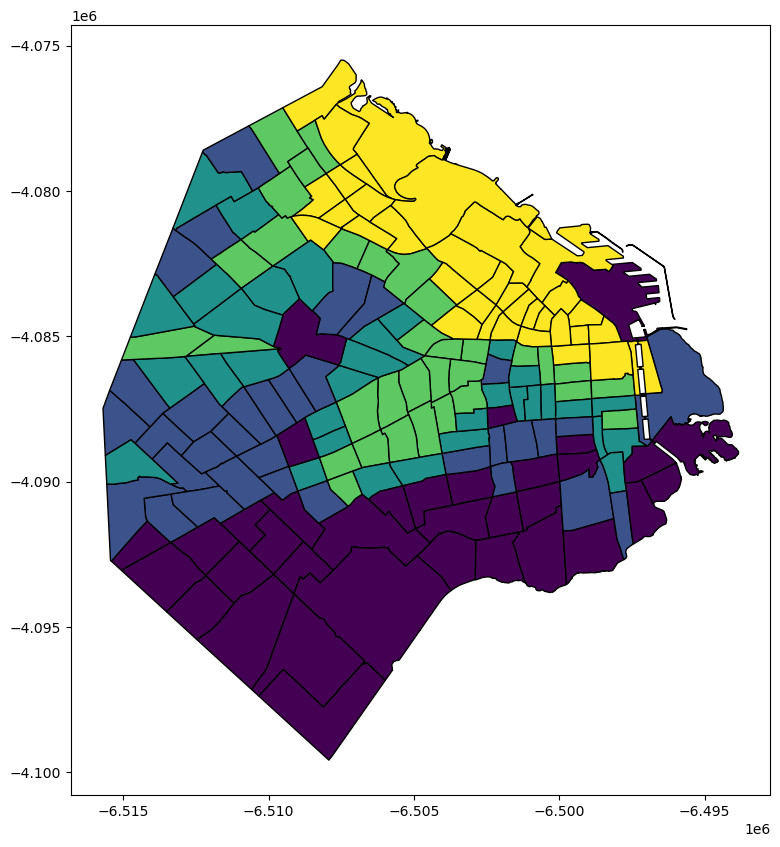

In [17]:
NIVELE = rosetta[["RADIO","P_NIVELED"]]
NIVELEM = pd.merge(NIVELE,tabla_intermedia,on="RADIO",how="inner")
NIVELEME = pd.merge(tabla_intermedia,NIVELEM,on="RADIO",how="inner")
NIVELEME.rename(columns={"circuito_x":"circuito"},inplace=True)
NIVELEME = NIVELEME[["circuito","P_NIVELED"]]
ED_agrupado = NIVELEME.groupby(['circuito']).mean()
ED_agrupado.reset_index(inplace=True)
ED_agrupado = ED_agrupado.rename(columns = {'index':'circuito'})
EDMERG = pd.merge(circuitos_geometria,ED_agrupado,on="circuito",how="inner")
EDMERG.plot(column='P_NIVELED', scheme='quantiles', figsize=(10, 10),edgecolor="k")

In [92]:
voto_circuito = pd.read_csv("voto_circuito.csv")
voto_circuito

,Unnamed: 0,circuito,pp1,pp2,pp3,pp4,nv,suma_votos,geometry
0,0,1,1955,2113,1237,1182,1655,8142,POLYGON Z ((-6497294.216384983 -4088142.492831...
1,1,2,2005,2122,1220,1390,1618,8355,POLYGON Z ((-6498537.655097145 -4087740.683913...
2,2,3,600,812,286,383,509,2590,POLYGON Z ((-6496304.252153359 -4084732.696892...
3,3,4,336,371,140,196,240,1283,POLYGON Z ((-6497398.411428367 -4087025.704760...
4,4,5,4053,4071,3029,2929,3443,17525,MULTIPOLYGON Z (((-6497185.902520441 -4082052....
...,...,...,...,...,...,...,...,...,...
162,162,163,2290,2276,2040,2174,2174,10954,POLYGON Z ((-6505348.070224387 -4083866.211011...
163,163,164,2095,1900,2039,2106,2119,10259,POLYGON Z ((-6507652.049725334 -4084945.660606...
164,164,165,3618,3588,3157,3399,3501,17263,POLYGON Z ((-6508638.340413763 -4081745.040090...
165,165,166,2970,2569,2773,2878,2798,13988,POLYGON Z ((-6508941.686026175 -4083702.128802...


In [93]:
voto_circuito["Porcentaje PP2"] = voto_circuito["pp2"]/voto_circuito["suma_votos"]*100

In [94]:
suma_voto1 = voto_circuito["Porcentaje PP2"].to_frame()

In [95]:
voto_circuito["Porcentaje PP2"] = suma_voto1

In [97]:
voto_circuito = voto_circuito.astype("str")

In [101]:
voto_circuito["circuito"] = voto_circuito["circuito"].str.pad(width=4, side='left', fillchar='0')

In [104]:
voto_circuito["circuito"] = voto_circuito["circuito"].to_frame()

In [106]:
voto_circuito = voto_circuito.drop(["Unnamed: 0"], axis=1)

In [107]:
voto_circuito

,circuito,pp1,pp2,pp3,pp4,nv,suma_votos,geometry,Porcentaje PP2
0,0001,1955,2113,1237,1182,1655,8142,POLYGON Z ((-6497294.216384983 -4088142.492831...,25.951854581183987
1,0002,2005,2122,1220,1390,1618,8355,POLYGON Z ((-6498537.655097145 -4087740.683913...,25.39796529024536
2,0003,600,812,286,383,509,2590,POLYGON Z ((-6496304.252153359 -4084732.696892...,31.351351351351354
3,0004,336,371,140,196,240,1283,POLYGON Z ((-6497398.411428367 -4087025.704760...,28.9166017147311
4,0005,4053,4071,3029,2929,3443,17525,MULTIPOLYGON Z (((-6497185.902520441 -4082052....,23.229671897289585
...,...,...,...,...,...,...,...,...,...
162,0163,2290,2276,2040,2174,2174,10954,POLYGON Z ((-6505348.070224387 -4083866.211011...,20.777798064633924
163,0164,2095,1900,2039,2106,2119,10259,POLYGON Z ((-6507652.049725334 -4084945.660606...,18.520323618286383
164,0165,3618,3588,3157,3399,3501,17263,POLYGON Z ((-6508638.340413763 -4081745.040090...,20.784336442101605
165,0166,2970,2569,2773,2878,2798,13988,POLYGON Z ((-6508941.686026175 -4083702.128802...,18.365742064626822


In [108]:
NIVELE = rosetta[["RADIO","P_NIVELED"]]
NIVELEM = pd.merge(NIVELE,tabla_intermedia,on="RADIO",how="inner")
NIVELEME = pd.merge(tabla_intermedia,NIVELEM,on="RADIO",how="inner")
NIVELEME.rename(columns={"circuito_x":"circuito"},inplace=True)
NIVELEME = NIVELEME[["circuito","P_NIVELED"]]
ED_agrupado = NIVELEME.groupby(['circuito']).mean()
ED_agrupado.reset_index(inplace=True)
ED_agrupado = ED_agrupado.rename(columns = {'index':'circuito'})
EDMERG = pd.merge(voto_circuito,ED_agrupado,on="circuito",how="inner")

In [109]:
EDMERG

,circuito,pp1,pp2,pp3,pp4,nv,suma_votos,geometry,Porcentaje PP2,P_NIVELED
0,0001,1955,2113,1237,1182,1655,8142,POLYGON Z ((-6497294.216384983 -4088142.492831...,25.951854581183987,4.486574
1,0002,2005,2122,1220,1390,1618,8355,POLYGON Z ((-6498537.655097145 -4087740.683913...,25.39796529024536,4.659491
2,0003,600,812,286,383,509,2590,POLYGON Z ((-6496304.252153359 -4084732.696892...,31.351351351351354,4.120536
3,0004,336,371,140,196,240,1283,POLYGON Z ((-6497398.411428367 -4087025.704760...,28.9166017147311,5.716904
4,0005,4053,4071,3029,2929,3443,17525,MULTIPOLYGON Z (((-6497185.902520441 -4082052....,23.229671897289585,2.879992
...,...,...,...,...,...,...,...,...,...,...
162,0163,2290,2276,2040,2174,2174,10954,POLYGON Z ((-6505348.070224387 -4083866.211011...,20.777798064633924,4.240253
163,0164,2095,1900,2039,2106,2119,10259,POLYGON Z ((-6507652.049725334 -4084945.660606...,18.520323618286383,4.258699
164,0165,3618,3588,3157,3399,3501,17263,POLYGON Z ((-6508638.340413763 -4081745.040090...,20.784336442101605,4.447598
165,0166,2970,2569,2773,2878,2798,13988,POLYGON Z ((-6508941.686026175 -4083702.128802...,18.365742064626822,4.308823


In [ ]:
### ¿Cómo saber el género de los que votan a mi candidato?

In [115]:
SEXO = rosetta[["RADIO","SEXO"]]

In [117]:
pd.unique(SEXO['SEXO'])

array([2, 1], dtype=int64)

In [118]:
SEXOM = pd.merge(SEXO,tabla_intermedia,on="RADIO",how="inner")
SEXOME = pd.merge(tabla_intermedia,SEXOM,on="RADIO",how="inner")
SEXOME.rename(columns={"circuito_x":"circuito"},inplace=True)
SEXOME = SEXOME[["circuito","SEXO"]]

In [119]:
SEXOMERG = pd.merge(voto_circuito,SEXOME,on="circuito",how="inner")

In [120]:
SEXOMERG

,circuito,pp1,pp2,pp3,pp4,nv,suma_votos,geometry,Porcentaje PP2,SEXO
0,0001,1955,2113,1237,1182,1655,8142,POLYGON Z ((-6497294.216384983 -4088142.492831...,25.951854581183987,1
1,0001,1955,2113,1237,1182,1655,8142,POLYGON Z ((-6497294.216384983 -4088142.492831...,25.951854581183987,2
2,0001,1955,2113,1237,1182,1655,8142,POLYGON Z ((-6497294.216384983 -4088142.492831...,25.951854581183987,1
3,0001,1955,2113,1237,1182,1655,8142,POLYGON Z ((-6497294.216384983 -4088142.492831...,25.951854581183987,2
4,0001,1955,2113,1237,1182,1655,8142,POLYGON Z ((-6497294.216384983 -4088142.492831...,25.951854581183987,1
...,...,...,...,...,...,...,...,...,...,...
2888477,0167,2358,2033,2091,2317,2250,11049,POLYGON Z ((-6509514.870084269 -4084304.493367...,18.39985519051498,1
2888478,0167,2358,2033,2091,2317,2250,11049,POLYGON Z ((-6509514.870084269 -4084304.493367...,18.39985519051498,2
2888479,0167,2358,2033,2091,2317,2250,11049,POLYGON Z ((-6509514.870084269 -4084304.493367...,18.39985519051498,1
2888480,0167,2358,2033,2091,2317,2250,11049,POLYGON Z ((-6509514.870084269 -4084304.493367...,18.39985519051498,2
